# Notebook associated with our manuscript on FAIR-Bio-RS

## Import required packages

In [69]:
from github import Github
import pandas as pd
import time
import os
import math
from IPython.display import clear_output
import collections
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
color_6 = '#fb5607'
color_5 = '#ef476f'
color_2 = '#ffd166'
color_3 = '#06d6a0'
color_4 = '#118ab2'
color_1 = '#073b4c'
color_palette = [color_1, color_2, color_3, color_4, color_5, color_6]

import seaborn as sns
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

## General functions

In [210]:
def create_folder_if_not_exist(folder_path):
    if not os.path.isdir(folder_path):
        os.mkdir(folder_path)
    return(folder_path)
        
def save_image_png(fig, folder_path, plot_name):
    folder_path = create_folder_if_not_exist(folder_path)
    file_name = plot_name + ".png"
    file_path = os.path.join(folder_path, file_name)
    fig.savefig(file_path, bbox_inches='tight')

def frenquency_suggestions(df_sub):
    #Frequency of suggestions
    list_suggestions = list (df_sub.values)
    list_suggestions_cleaned = []
    for item in list_suggestions:
        item = item.split(";")
        list_suggestions_cleaned.extend(item) 
    list_suggestions_cleaned = [x.strip() for x in list_suggestions_cleaned]
    frequency_all = dict(collections.Counter(list_suggestions_cleaned))
    frequency = dict( sorted(frequency_all.items(),
                               key=lambda item: item[1],
                               reverse=True))
    return(frequency)
current_folder = os.getcwd()

## Number of biomedical related repositories on GitHub

In [29]:
GITHUB_ACCESS_TOKEN = os.getenv('GITHUB_ACCESS_TOKEN')
g = Github(GITHUB_ACCESS_TOKEN)
print('Success: GitHub Access Token loaded')

Success: GitHub Access Token loaded


In [9]:
#get number of repositories on GitHub with "biomedical" included in the name, readme, or description created in a given month of a year
#since the GitHub API has a result rate limit of 1000, we search month by month assuming no single month has more than 1000 results
#we then combined monthly results to get year-wise number of repositories created with keyword biomedical
#results are saved in a dataframe and csv file for further analysis
#this code block can be skipped since the csv file with results is included with the code
def search_github_repo_created_month(keywords, created_month):
    created_month_query  = ' created:' + created_month
    query = keywords + ' in:name'+ ' in:readme' + ' in:description' + created_month_query
    result = g.search_repositories(query)
    return result

keywords = 'biomedical'
start_year = 2010
end_year = 2021
year_list = [str(x) for x in range(start_year, end_year+1)]
month_list = ["%.2d" % x for x in range(1,13)]
df = pd.DataFrame(columns = ['year', 'month', 'count'])
search_count = 0
search_limit = 30
# for year in year_list:
#     for month in month_list:
#         created_month = year + '-' + month
#         result = search_github_repo_created_month(keywords, created_month)
#         df.loc[len(df.index)] = [year, month, result.totalCount] 
#         search_count += 1
#         if search_count == search_limit:
#             time.sleep(65)
#             search_count = 0
print("Success: Month-wise number of repositories created on GitHub between " + str(start_year) + " and " + str(end_year) + " with keyword biomedical pulled and saved in a dataframe")

#get year wise results
#df_yearwise = pd.DataFrame(columns = ['year', 'count'])
# for year in year_list:
#     df_sub = df[df['year'] == year]
#     total = df_sub['count'].sum()
#     df_yearwise.loc[len(df_yearwise.index)] = [year, total] 
df_yearwise.to_csv('github_biomedical_repo_count_yearwise.csv')
print("Success: Year-wise number of repositories created on GitHub between " + str(start_year) + " and " + str(end_year) + " with keyword biomedical calculated saved in a dataframe and in a csv file")
print(df_yearwise)

Success: Month-wise number of repositories created on GitHub between 2010 and 2021 with keyword biomedical pulled and saved in a dataframe


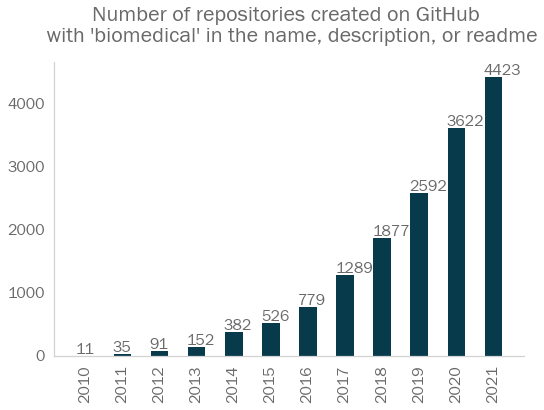

In [269]:
# visualize results
github_input_file = os.path.join('input','github_biomedical_repo_count_yearwise.csv')
df = pd.read_csv(github_input_file)
fig, ax = plt.subplots(figsize=(8,6))
width = 0.5
ind = 0
x = df['year']
y = df["count"]
bars = ax.bar(x, y, width, color=color_palette[ind])
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x(), yval + 20, round(yval,1))
ind+=1
ax.set_xticks(df['year'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Number of repositories created on GitHub \n with 'biomedical' in the name, description, or readme", fontsize = 22, y = 1.05)
plt.xticks(rotation=90, ha = 'center')
fig.tight_layout()
plot_name = 'github-biomedical-repo-count-yearwise'
save_image_png(fig, 'output', plot_name)

## Review analysis

In [282]:
# Load review data
# This section requires the data.xlsx file available in the docs folder at https://github.com/fairdataihub/FAIR-BioRS-data and at [ZENODO LINK]
# This assumes that the FAIR-BioRS-data folder is at the same location as the FAIR-BioRS-code folder
main_folder = os.path.dirname(os.getcwd())
data_folder = os.path.join(main_folder, 'FAIR-BioRS-data', 'docs')
data_file_name = 'data.xlsx'
data_file_location = os.path.join(data_folder, data_file_name)
df = pd.read_excel(data_file_location,
              sheet_name='literatureReviewKeywords')  

### Files suggested to be shared

In [283]:
#Number of studies
df_sub = df['dataFileSuggestion'].iloc[2:].dropna()
total_studies = len(df_sub)
print("From the reviewed studies, " + str(total_studies) + " made a suggestion about the files to be shared for a research software")
print(df_sub)

From the reviewed studies, 4 made a suggestion about the files to be shared for a research software
3                  Source code; Executable
9                              Source code
19    Source code; Input data; Result data
32                             Source code
Name: dataFileSuggestion, dtype: object


In [284]:
#Frequency of suggestions
frequency = frenquency_suggestions(df_sub)
print(frequency)

{'Source code': 4, 'Executable': 1, 'Input data': 1, 'Result data': 1}


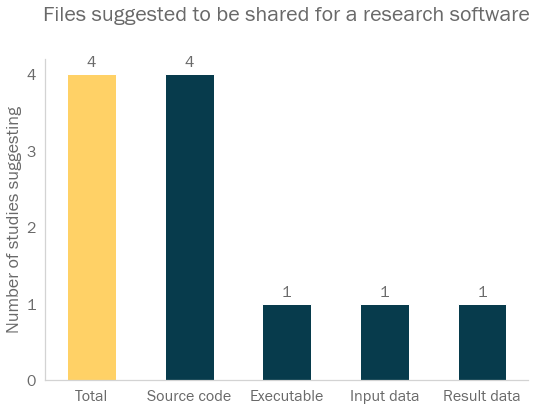

In [285]:
# Visualize
fig, ax = plt.subplots(figsize=(8,6))
width = 0.5
ind = 0
x = list(frequency.keys())
y = list(frequency.values())

# total
bars = ax.bar("Total", total_studies, width, color=color_palette[1])
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x()+0.2, yval + 0.1, round(yval,1))
bars = (ax.bar(x, y, width, color=color_palette[ind]))
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x()+0.2, yval + 0.1, round(yval,1))
ind+=1
ax.set_xticks(["Total"] + x)
ax.set_yticks(range(0, max(y)+1))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Number of studies suggesting', fontsize=18)
plt.title("Files suggested to be shared for a research software", fontsize = 22, y = 1.1)
plt.xticks(ha = 'center')
fig.tight_layout()
plot_name = 'files-suggested'
save_image_png(fig, 'output', plot_name)

### Metadata files suggested to be included

In [286]:
#Number of studies
df_sub = df['metadataFilesSuggestion'].iloc[2:].dropna()
total_studies = len(df_sub)
print("From the reviewed studies, " + str(total_studies) + " made a suggestion about the metadata files and schema to be included for a research software")
print(df_sub)

From the reviewed studies, 13 made a suggestion about the metadata files and schema to be included for a research software
2                                              CodeMeta
4     biotoolsSchema; CodeMeta; Bioschemas Tool prof...
5                                              CodeMeta
9                                              CodeMeta
10                                             CodeMeta
15                                             CodeMeta
18                 CodeMeta; EDAM; Citation File Format
22                       Citation File Format; CodeMeta
24                                             CodeMeta
25                       Citation File Format; CodeMeta
30                       CodeMeta; Citation File Format
36                                 Citation File Format
41                                 Citation File Format
Name: metadataFilesSuggestion, dtype: object


In [287]:
#Frequency of suggestions
frequency = frenquency_suggestions(df_sub)
print(frequency)

{'CodeMeta': 11, 'Citation File Format': 6, 'EDAM': 2, 'biotoolsSchema': 1, 'Bioschemas Tool profile': 1, 'R packages DESCRIPTION file': 1, 'PEP 566 Metadata for Python Software Packages': 1, 'Software Ontology': 1, 'OntoSoft': 1, 'PROV-O': 1, 'RDA Research Schemas': 1}


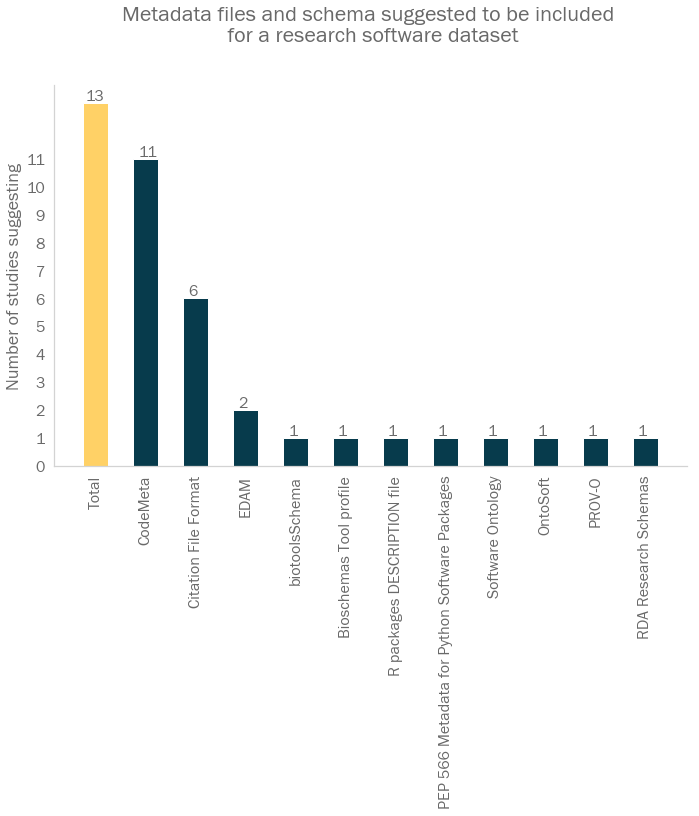

In [288]:
# Visualize
fig, ax = plt.subplots(figsize=(10,12))
width = 0.5
ind = 0
x = list(frequency.keys())
y = list(frequency.values())

# total
bars = ax.bar("Total", total_studies, width, color=color_palette[1])
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x()+0.05, yval + 0.1, round(yval,1))
bars = (ax.bar(x, y, width, color=color_palette[ind]))
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x()+0.1, yval + 0.1, round(yval,1))
ind+=1
ax.set_xticks(["Total"] + x)
ax.set_yticks(range(0, max(y)+1))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Number of studies suggesting', fontsize=18)
plt.title("Metadata files and schema suggested to be included \n for a research software dataset", fontsize = 22, y = 1.1)
plt.xticks(rotation=90, ha = 'center')
fig.tight_layout()
plot_name = 'metadata-files-suggested'
save_image_png(fig, 'output', plot_name)

### License suggested to be used

In [296]:
#Number of studies
df_sub = df['licenseSuggestion'].iloc[2:].dropna()
total_studies = len(df_sub)
print("From the reviewed studies, " + str(total_studies) + " made a suggestion about the licenses to be used for sharing a research software")
print(df_sub)

From the reviewed studies, 13 made a suggestion about the licenses to be used for sharing a research software
2                                  Open source licenses
4             Open source licenses; Permissive licenses
10                                 Open source licenses
11                                OSI-approved licenses
22                                 Open source licenses
24           Licenses from the SPDX referential catalog
25    FSF-approved licenses; OSI-approved licenses; ...
28                                 Open source licenses
30                                      Apache 2.0; MIT
36                                OSI-approved licenses
37                                 Open source licenses
42                                  Permissive licenses
46                                 Open source licenses
Name: licenseSuggestion, dtype: object


In [297]:
#Frequency of suggestions
frequency = frenquency_suggestions(df_sub)
print(frequency)

{'Open source licenses': 7, 'OSI-approved licenses': 3, 'Permissive licenses': 2, 'Apache 2.0': 2, 'MIT': 2, 'Licenses from the SPDX referential catalog': 1, 'FSF-approved licenses': 1}


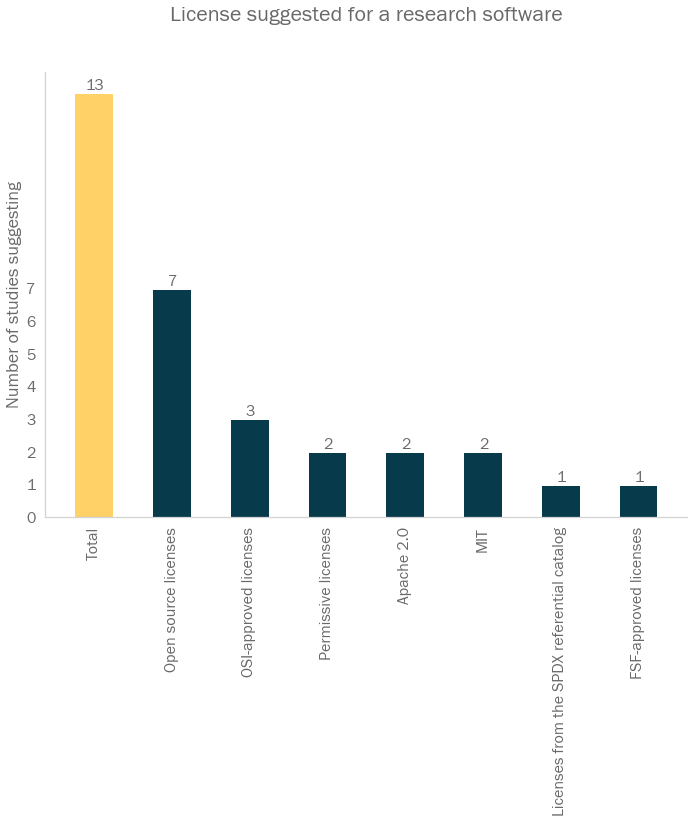

In [298]:
# Visualize
fig, ax = plt.subplots(figsize=(10,12))
width = 0.5
ind = 0
x = list(frequency.keys())
y = list(frequency.values())

# total
bars = ax.bar("Total", total_studies, width, color=color_palette[1])
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x()+0.15, yval + 0.1, round(yval,1))
bars = (ax.bar(x, y, width, color=color_palette[ind]))
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x()+0.2, yval + 0.1, round(yval,1))
ind+=1
ax.set_xticks(["Total"] + x)
ax.set_yticks(range(0, max(y)+1))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Number of studies suggesting', fontsize=18)
plt.title("License suggested for a research software", fontsize = 22, y = 1.1)
plt.xticks(rotation=90, ha = 'center')
fig.tight_layout()
plot_name = 'license-suggested'
save_image_png(fig, 'output', plot_name)

### Repositories suggested to be used

In [299]:
#Number of studies
df_sub = df['repositorySuggestion'].iloc[2:].dropna()
total_studies = len(df_sub)
print("From the reviewed studies, " + str(total_studies) + " made a suggestion about the repositories to use for sharing a research software")
print(df_sub)

From the reviewed studies, 18 made a suggestion about the repositories to use for sharing a research software
4     Zenodo; Software Heritage; CRAN; PyPI; Figshare
5                      Zenodo; HAL; Software Heritage
9                           Zenodo; Software Heritage
10                     Software Heritage; HAL; Zenodo
12                                   Figshare; Zenodo
15                          Zenodo; Software Heritage
18              Zenodo; Software Heritage; PyPI; CRAN
19                          Figshare; Zenodo; ModelDB
22                          Zenodo; Software Heritage
25              Zenodo; Figshare; Mendeley Data; CRAN
30                Zenodo; Figshare; Software Heritage
36                                             Zenodo
37                                           Figshare
39         CRAN; NanoHub; Dataverse; Zenodo; Figshare
40                                             Zenodo
42                                   Figshare; Zenodo
44           Zenodo; Figsh

In [300]:
#Frequency of suggestions
frequency = frenquency_suggestions(df_sub)
print(frequency)

{'Zenodo': 17, 'Figshare': 10, 'Software Heritage': 9, 'CRAN': 4, 'HAL': 3, 'PyPI': 2, 'ModelDB': 1, 'Mendeley Data': 1, 'NanoHub': 1, 'Dataverse': 1}


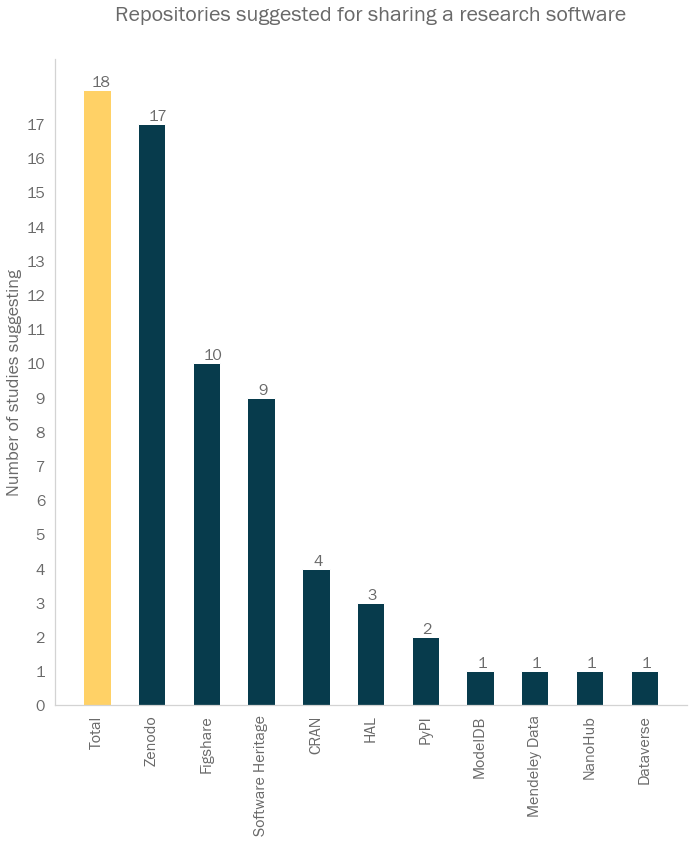

In [301]:
# Visualize
fig, ax = plt.subplots(figsize=(10,12))
width = 0.5
ind = 0
x = list(frequency.keys())
y = list(frequency.values())

# total
bars = ax.bar("Total", total_studies, width, color=color_palette[1])
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x()+0.15, yval + 0.1, round(yval,1))
bars = (ax.bar(x, y, width, color=color_palette[ind]))
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x()+0.2, yval + 0.1, round(yval,1))
ind+=1
ax.set_xticks(["Total"] + x)
ax.set_yticks(range(0, max(y)+1))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Number of studies suggesting', fontsize=18)
plt.title("Repositories suggested for sharing a research software", fontsize = 22, y = 1.05)
plt.xticks(rotation=90, ha = 'center')
fig.tight_layout()
plot_name = 'repositories-suggested'
save_image_png(fig, 'output', plot_name)

### Registeries suggested to be used

In [302]:
#Number of studies
df_sub = df['registerySuggestion'].iloc[2:].dropna()
total_studies = len(df_sub)
print("From the reviewed studies, " + str(total_studies) + " made a suggestion about the registeries to use for a research software")
print(df_sub)

From the reviewed studies, 7 made a suggestion about the registeries to use for a research software
4     Zenodo; Software Heritage; CRAN; PyPI; Figshar...
5            Zenodo; HAL; Software Heritage; CRAN; PyPI
9                                                Zenodo
11            bio.tools; biojs.io; Omic Tools; DataCite
18    bio.tools; Research Software Directory; rOpenS...
25                                                 CRAN
36                       Conda; Bioconductor; Dockstore
Name: registerySuggestion, dtype: object


In [303]:
#Frequency of suggestions
frequency = frenquency_suggestions(df_sub)
print(frequency)

{'Zenodo': 4, 'CRAN': 3, 'bio.tools': 3, 'Software Heritage': 2, 'PyPI': 2, 'Conda': 2, 'Figshare': 1, 'BioConductor': 1, 'BioContainers': 1, 'ASCL': 1, 'swMath': 1, 'CLARIN': 1, 'FAIRsharing': 1, 'HAL': 1, 'biojs.io': 1, 'Omic Tools': 1, 'DataCite': 1, 'Research Software Directory': 1, 'rOpenSci Project': 1, 'Bioconductor': 1, 'Dockstore': 1}


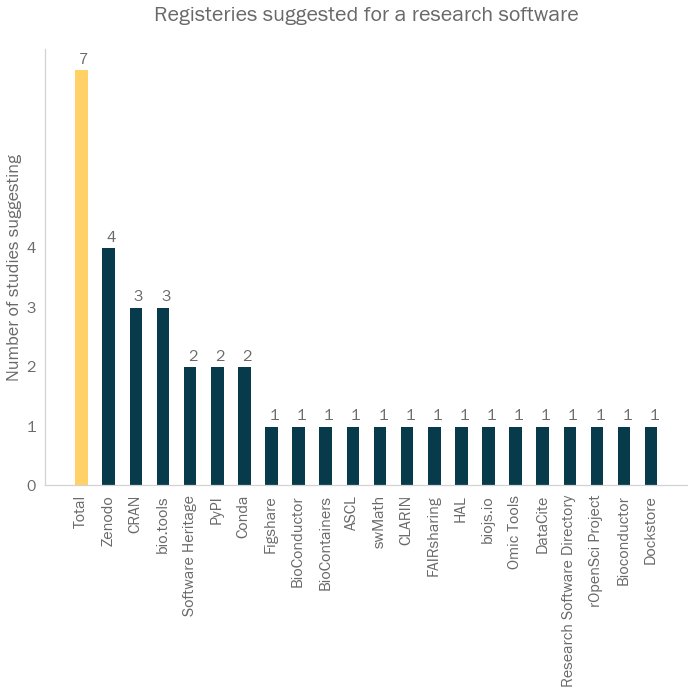

In [304]:
# Visualize
fig, ax = plt.subplots(figsize=(10,10))
width = 0.5
ind = 0
x = list(frequency.keys())
y = list(frequency.values())

# total
bars = ax.bar("Total", total_studies, width, color=color_palette[1])
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x()+0.15, yval + 0.1, round(yval,1))
bars = (ax.bar(x, y, width, color=color_palette[ind]))
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x()+0.2, yval + 0.1, round(yval,1))
ind+=1
ax.set_xticks(["Total"] + x)
ax.set_yticks(range(0, max(y)+1))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Number of studies suggesting', fontsize=18)
plt.title("Registeries suggested for a research software", fontsize = 22, y = 1.05)
plt.xticks(rotation=90, ha = 'center')
fig.tight_layout()
plot_name = 'registeries-suggested'
save_image_png(fig, 'output', plot_name)